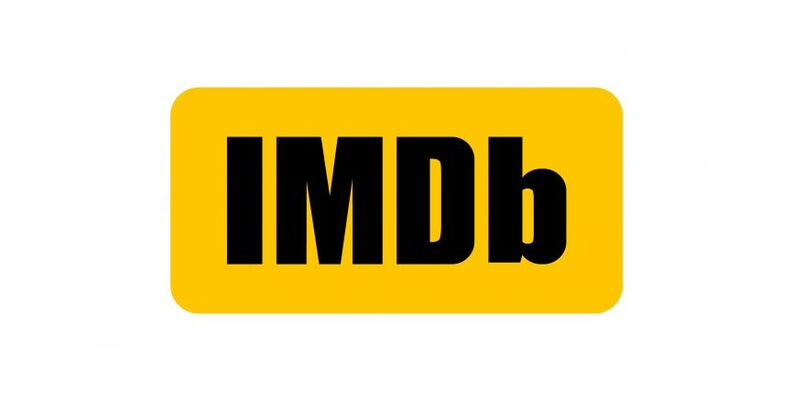

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
df=pd.read_csv('imbd dataset.csv')

In [27]:
df.head()

,id,title,type,genres,averageRating,numVotes,releaseYear
0,tt0000009,Miss Jerry,movie,Romance,5.4,215.0,1894.0
1,tt0000147,The Corbett-Fitzsimmons Fight,movie,"Documentary, News, Sport",5.2,539.0,1897.0
2,tt0000502,Bohemios,movie,NaN,4.4,18.0,1905.0
3,tt0000574,The Story of the Kelly Gang,movie,"Action, Adventure, Biography",6.0,941.0,1906.0
4,tt0000591,The Prodigal Son,movie,Drama,5.7,28.0,1907.0


In [28]:
df.tail()

,id,title,type,genres,averageRating,numVotes,releaseYear
1031155,tt34744070,The Garden of Earthly Delights,movie,Drama,NaN,NaN,NaN
1031156,tt34744711,The Musical Murder,tvMiniSeries,Drama,NaN,NaN,2024.0
1031157,tt34744743,Ananthamm,movie,Crime,NaN,NaN,2025.0
1031158,tt34744754,"María Dolores Pradera, a pura voz.",movie,Documentary,NaN,NaN,2024.0
1031159,tt34744758,The Herb Train,movie,Comedy,NaN,NaN,2020.0


In [29]:
df.shape

(1031160, 7)

In [30]:
df.columns

Index(['id', 'title', 'type', 'genres', 'averageRating', 'numVotes',
       'releaseYear'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031160 entries, 0 to 1031159
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1031160 non-null  object 
 1   title          1031158 non-null  object 
 2   type           1031160 non-null  object 
 3   genres         930428 non-null   object 
 4   averageRating  440232 non-null   float64
 5   numVotes       440232 non-null   float64
 6   releaseYear    902397 non-null   float64
dtypes: float64(3), object(4)
memory usage: 55.1+ MB


In [32]:
df.isnull().sum()

id                    0
title                 2
type                  0
genres           100732
averageRating    590928
numVotes         590928
releaseYear      128763
dtype: int64

In [33]:
df.describe()

,averageRating,numVotes,releaseYear
count,440232.000000,4.402320e+05,902397.000000
mean,6.363075,3.045831e+03,1998.298651
std,1.431690,3.267483e+04,27.050583
min,1.000000,5.000000e+00,1894.000000
25%,5.500000,1.700000e+01,1986.000000
50%,6.500000,5.200000e+01,2010.000000
75%,7.400000,2.600000e+02,2018.000000
max,10.000000,2.967477e+06,2031.000000


In [34]:
df.duplicated().sum()

np.int64(0)

In [35]:
df.shape

(1031160, 7)

In [36]:
df.dropna(inplace=True)
df.isnull().sum()

id               0
title            0
type             0
genres           0
averageRating    0
numVotes         0
releaseYear      0
dtype: int64

In [37]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [38]:
df.shape

(425351, 7)

In [39]:
df.to_csv('imbd_clean.csv', index=False)

Text(0.5, 1.0, 'distribution of average rating')

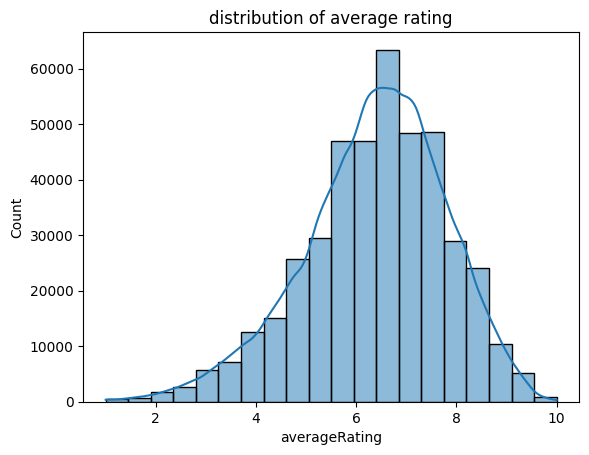

In [40]:
sns.histplot(df['averageRating'],bins=20,kde=True)
plt.title('distribution of average rating')

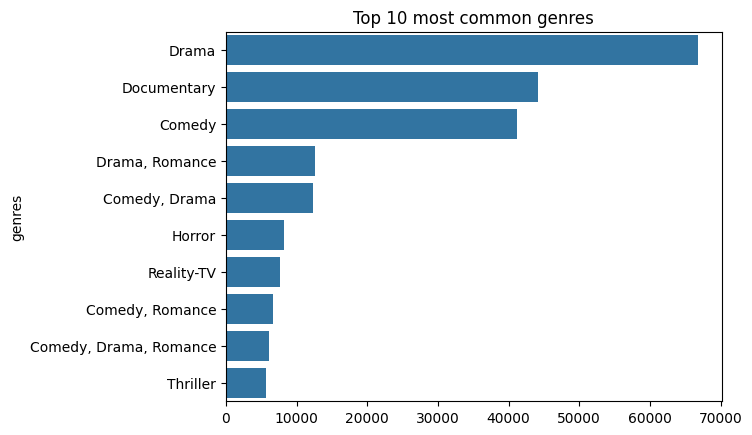

In [41]:
genre_counts = df['genres'].value_counts().head (10)
sns.barplot(x=genre_counts.values,y=genre_counts.index)
plt.title('Top 10 most common genres')
plt.show()

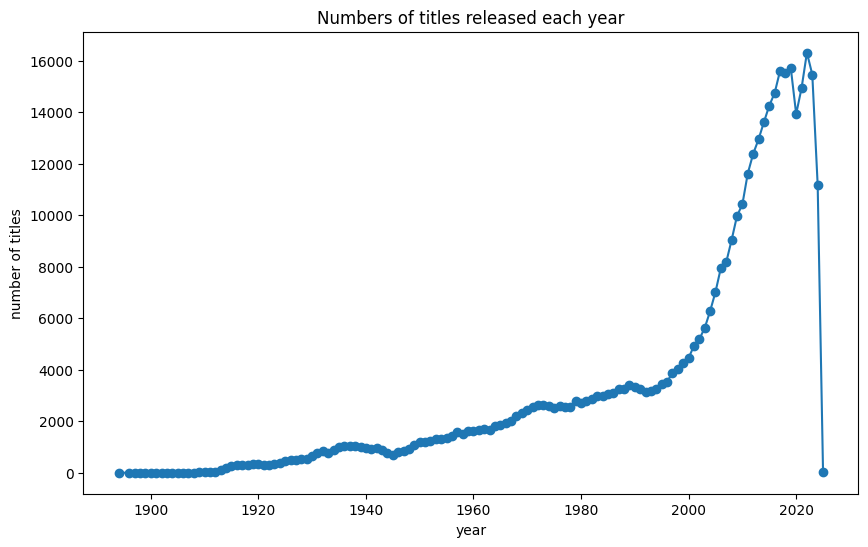

In [42]:
year_counts =df['releaseYear'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.plot(year_counts.index,year_counts.values,marker='o')
plt.title('Numbers of titles released each year')
plt.xlabel('year')
plt.ylabel('number of titles')
plt.show()

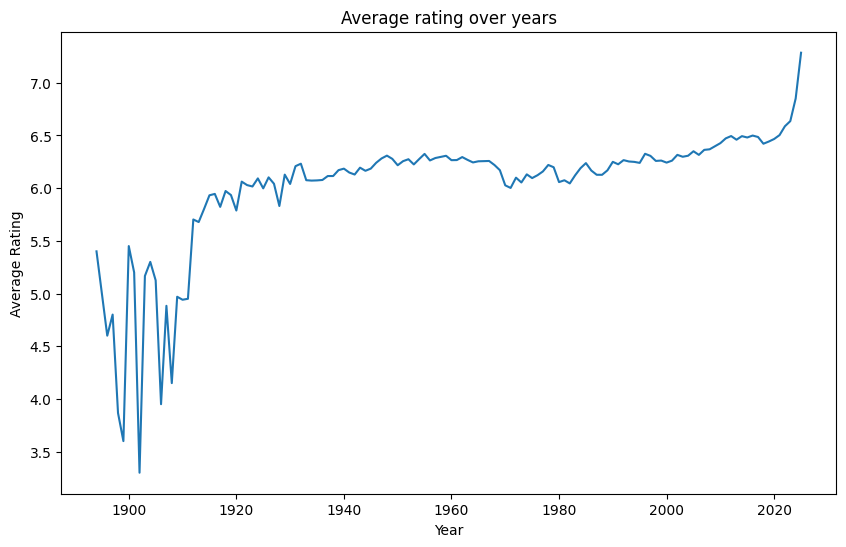

In [43]:
yearly_avg_rating=df.groupby('releaseYear')['averageRating'].mean()
plt.figure(figsize=(10,6))
sns.lineplot(x=yearly_avg_rating.index,y=yearly_avg_rating.values)
plt.title('Average rating over years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

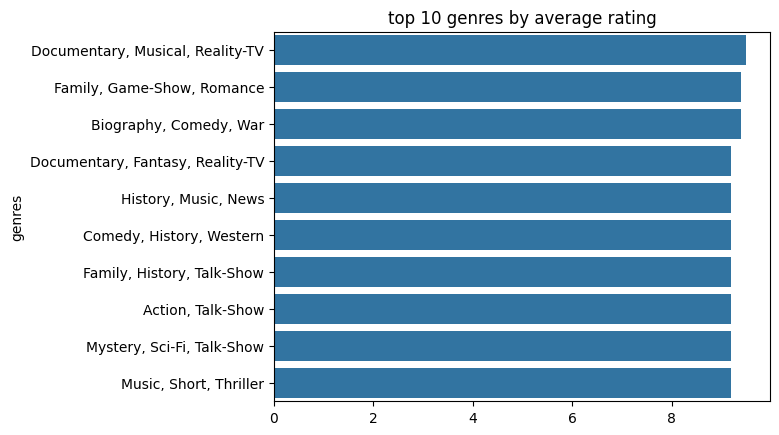

In [44]:
genres_avg = df.groupby('genres')['averageRating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=genres_avg.values,y=genres_avg.index)
plt.title('top 10 genres by average rating')
plt.show()

Correlation between ratings and votes 0.05043370319922632


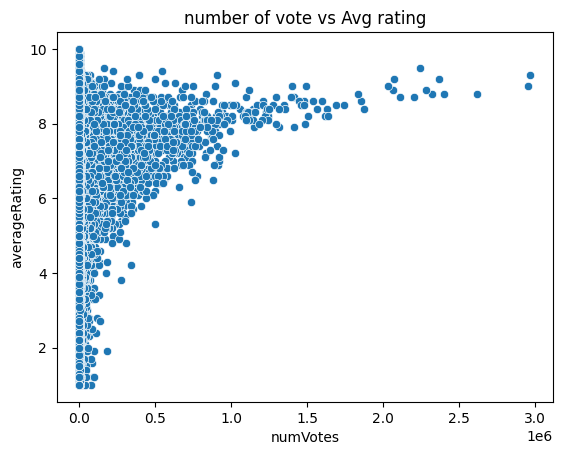

In [45]:
correlation=df['averageRating'].corr(df['numVotes'])
print('Correlation between ratings and votes',correlation)
sns.scatterplot(x='numVotes',y='averageRating',data=df)
plt.title('number of vote vs Avg rating')
plt.show()

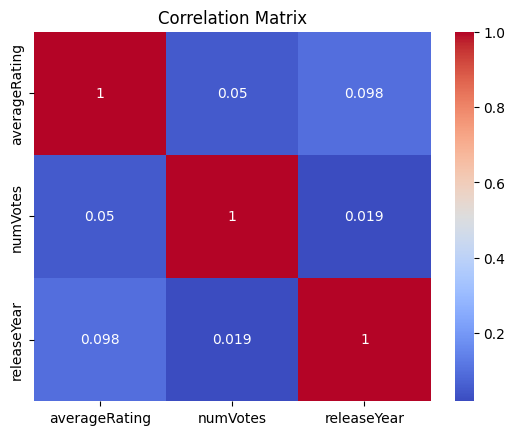

In [46]:
corr_matrix = df[['averageRating','numVotes','releaseYear']].corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

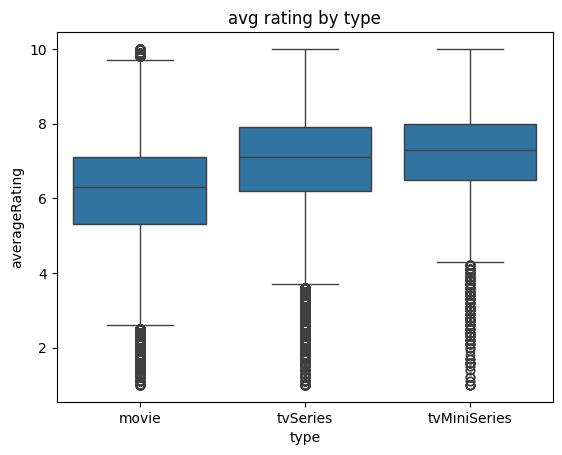

In [47]:
sns.boxplot(x='type',y='averageRating',data=df)
plt.title('avg rating by type')
plt.show()

In [48]:
df['decade']=(df['releaseYear']//10)*10
decade_analysis=df.groupby('decade').agg({'averageRating':'mean','id':'count'}).rename(columns={'id':'title count'})
print(decade_analysis)

        averageRating  title count
decade                            
1890.0       4.266667            9
1900.0       4.805000           40
1910.0       5.864009         1881
1920.0       6.010503         4151
1930.0       6.117272         9009
1940.0       6.212124         8867
1950.0       6.274273        13717
1960.0       6.246036        18820
1970.0       6.111381        25797
1980.0       6.133393        30414
1990.0       6.264005        35252
2000.0       6.332312        68659
2010.0       6.467193       136878
2020.0       6.597423        71857
